In [1]:
from algorithm.algorithm_body import GeneticAlgorithm
from algorithm.genetic_functions import mutate_to_legal, basic_mutation, permutation_mutation, territorial_mutation, max_reward_mutation, expansion_mutation
from data_structures.problem_structure import Problem
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import threading
import numpy as np
#import pickle
import dill as pickle

### Porównanie metod selekcji

Generation: 0, Best fitness: 61040.00, Worst fitness: -18130.62, Avg fitness: 30271.09
Generation: 1, Best fitness: 61040.00, Worst fitness: -20550.62, Avg fitness: 33914.98
Generation: 2, Best fitness: 65098.32, Worst fitness: 3096.99, Avg fitness: 35747.06
Generation: 3, Best fitness: 72570.00, Worst fitness: 5027.61, Avg fitness: 39777.04
Generation: 4, Best fitness: 72570.00, Worst fitness: 13599.97, Avg fitness: 39392.13
Generation: 5, Best fitness: 72570.00, Worst fitness: 3189.97, Avg fitness: 42057.30
Generation: 6, Best fitness: 72570.00, Worst fitness: -8393.01, Avg fitness: 43731.56
Generation: 7, Best fitness: 72570.00, Worst fitness: 1190.00, Avg fitness: 42113.90
Generation: 8, Best fitness: 72570.00, Worst fitness: -1750.00, Avg fitness: 43020.55
Generation: 9, Best fitness: 72570.00, Worst fitness: -332.40, Avg fitness: 45742.42
Generation: 10, Best fitness: 73129.96, Worst fitness: 10398.32, Avg fitness: 47099.32
Generation: 11, Best fitness: 73169.99, Worst fitness: 1

<Figure size 640x480 with 0 Axes>

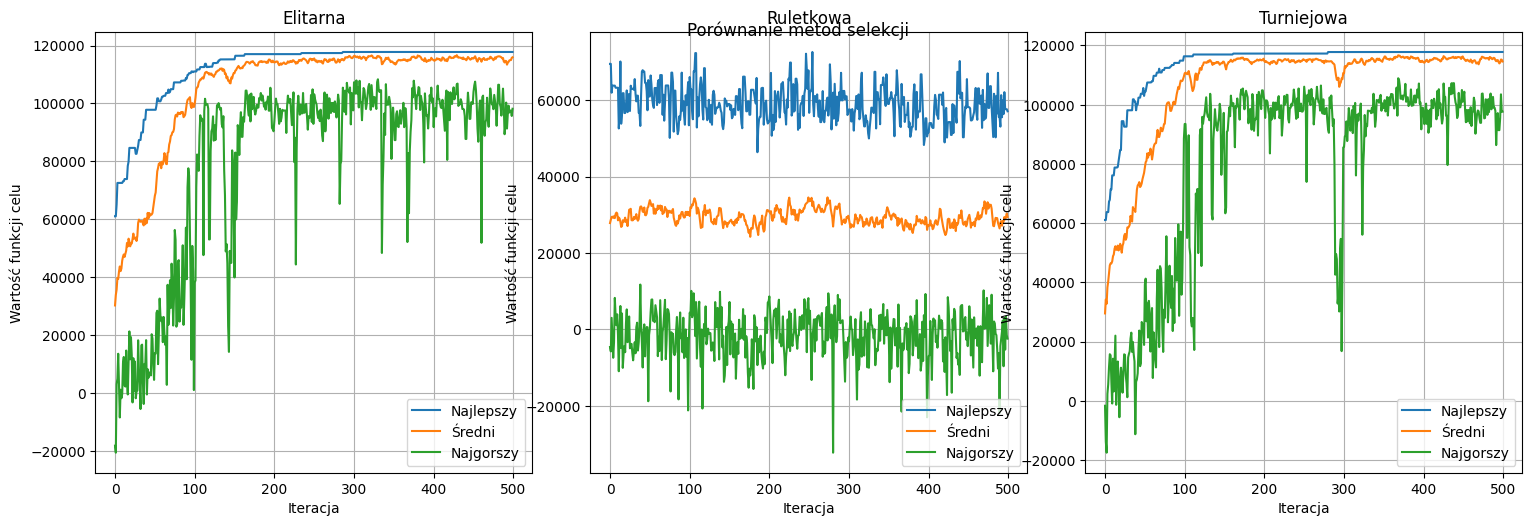

In [2]:
# Odkomentuj tylko za pierwszym razem, żeby stworzyć problem
  
problem = Problem(size=[15, 15], mutation_probs=[1, 0, 0, 0, 0],
            mutation_functions=[basic_mutation, permutation_mutation, territorial_mutation, max_reward_mutation, expansion_mutation],
            mutate_to_legal=mutate_to_legal, basic_mutation=basic_mutation, n=20)
with open("problem.pkl", 'wb') as f:
        pickle.dump(problem, f)

            
            
with open("problem.pkl", 'rb') as f:
    problem = pickle.load(f)
            
algorithm = GeneticAlgorithm(
    crossover_probs=[1, 0 , 0, 0],
    selection_types=["elitism_selection"],
    mutation_probs=[1, 0, 0, 0, 0],
    population_size = 100,
    max_iter = 500,
    mutation_probability = 0.1,
    elite_percentage = 20,
    load_population = False, # W kolejnych True
    problem=problem,
)

# Uruchomienie algorytmu
best_sol_1, bests_1, avgs_1, worsts_1 = algorithm.run()

with open("problem.pkl", 'rb') as f:
    problem = pickle.load(f)
            
algorithm = GeneticAlgorithm(
    crossover_probs=[1, 0 , 0, 0],
    selection_types=["roulette_selection"],
    mutation_probs=[1, 0, 0, 0, 0],
    population_size = 100,
    max_iter = 500,
    mutation_probability = 0.1,
    elite_percentage = 20,
    load_population = True, # W kolejnych True
    problem=problem,
)

# Uruchomienie algorytmu
best_sol_2, bests_2, avgs_2, worsts_2 = algorithm.run()

with open("problem.pkl", 'rb') as f:
    problem = pickle.load(f)
            
algorithm = GeneticAlgorithm(
    crossover_probs=[1, 0 , 0, 0],
    selection_types=["tournament_selection"],
    mutation_probs=[1, 0, 0, 0, 0],
    population_size = 100,
    max_iter = 500,
    mutation_probability = 0.1,
    elite_percentage = 20,
    load_population = True, # W kolejnych True
    problem=problem,
)

# Uruchomienie algorytmu
best_sol_3, bests_3, avgs_3, worsts_3 = algorithm.run()


plt.figure()

plt.subplots(1, 3, figsize=(15, 5))
plt.tight_layout()
#plt.suptitle("Porównanie metod selekcji")
plt.subplot(1, 3, 1)
plt.plot(bests_1, label="Najlepszy")
plt.plot(avgs_1, label="Średni")
plt.plot(worsts_1, label="Najgorszy")
plt.title("Elitarna")
plt.xlabel("Iteracja")
plt.ylabel("Wartość funkcji celu")
plt.grid(True)
plt.legend()
plt.subplot(1, 3, 2)
plt.plot(bests_2, label="Najlepszy")
plt.plot(avgs_2, label="Średni")
plt.plot(worsts_2, label="Najgorszy")
plt.title("Ruletkowa")
plt.xlabel("Iteracja")
plt.ylabel("Wartość funkcji celu")
plt.grid(True)
plt.legend()
plt.subplot(1, 3, 3)
plt.plot(bests_3, label="Najlepszy")
plt.plot(avgs_3, label="Średni")
plt.plot(worsts_3, label="Najgorszy")
plt.title("Turniejowa")
plt.xlabel("Iteracja")
plt.ylabel("Wartość funkcji celu")
plt.grid(True)
plt.legend()
plt.show()